In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from itertools import product
import matplotlib.pyplot as plt

# load dataset 7

In [2]:
df = pd.read_csv('7_total_loan_costs.csv', low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137500 entries, 0 to 137499
Data columns (total 36 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   census_tract                              137495 non-null  float64
 1   action_taken                              137500 non-null  int64  
 2   loan_type                                 137500 non-null  int64  
 3   lien_status                               137500 non-null  int64  
 4   reverse_mortgage                          137500 non-null  int64  
 5   open_end_line_of_credit                   137500 non-null  int64  
 6   loan_amount                               137500 non-null  int64  
 7   combined_loan_to_value_ratio              137094 non-null  float64
 8   interest_rate                             137500 non-null  object 
 9   total_loan_costs                          110401 non-null  float64
 10  origination_charges 

In [4]:
print(df['origination_charges'].value_counts())

0.0       29457
1205.0     3315
1330.0     3221
1430.0     2414
1130.0     2219
          ...  
639.5         1
591.44        1
708.0         1
2581.0        1
5308.0        1
Name: origination_charges, Length: 21695, dtype: int64


Origination charges may include various fees and costs, such as:

- Application Fee: A fee to cover the cost of processing your loan application.
- Underwriting Fee: This fee covers the cost of evaluating your creditworthiness and determining if you qualify for the loan.
- Loan Origination Fee: This is a fee charged by the lender for originating the loan. It is often a percentage of the loan amount.
- Points: Borrowers may pay points to lower their interest rate. Each point is equal to 1% of the loan amount.
- Processing Fee: This fee covers the cost of processing your loan, including documentation and verification.
- Document Preparation Fee: A fee for preparing loan documents.
- Credit Report Fee: The cost of obtaining a credit report to assess your credit history.
- Appraisal Fee: The cost of having a professional appraiser assess the value of the property being financed.
- Title Search and Title Insurance: Fees for researching the property's title and providing insurance to protect against title defects.
- Flood Certification Fee: A fee to determine if the property is in a flood zone.

In [5]:
unique_categories = df['origination_charges'].nunique()
print("Number of Unique Categories:", unique_categories)

Number of Unique Categories: 21695


In [6]:
# First, convert the 'origination_charges' column to numeric (float)
df['origination_charges'] = pd.to_numeric(df['origination_charges'], errors='coerce')

# Now, calculate the minimum, maximum, and median
minimum_interest_rate = df['origination_charges'].min()
maximum_interest_rate = df['origination_charges'].max()
median_interest_rate = df['origination_charges'].median()

print("Minimum origination_charges:", minimum_interest_rate)
print("Maximum origination_charges:", maximum_interest_rate)
print("Median origination_charges:", median_interest_rate)

Minimum origination_charges: 0.0
Maximum origination_charges: 64620.0
Median origination_charges: 998.06


In [7]:
# Find the top 5 rows with the highest origination charges
top_1_max_origination = df.nlargest(1, 'origination_charges')

# Print the result
top_1_max_origination

,census_tract,action_taken,loan_type,lien_status,reverse_mortgage,open_end_line_of_credit,loan_amount,combined_loan_to_value_ratio,interest_rate,total_loan_costs,...,co_applicant_sex,applicant_age,co_applicant_age,aus_1,applicant_race_1,applicant_race_2,co_applicant_race_1,co_applicant_race_2,applicant_ethnicity_1,co_applicant_ethnicity_1
41844,6.085508e+09,1,1,1,2,2,2005000,78.431,2.0-3.0,66947.43,...,3,1,0,5,5.0,NaN,NaN,NaN,2.0,NaN


# Check outliers

In [8]:
# Convert the 'origination_charges' column to numeric (float)
df['origination_charges'] = pd.to_numeric(df['origination_charges'], errors='coerce')  # 'coerce' handles non-numeric values by converting them to NaN

# Calculate the quantiles
Q1 = df['origination_charges'].quantile(0.25)
Q3 = df['origination_charges'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['origination_charges'] < lower_bound) | (df['origination_charges'] > upper_bound)]

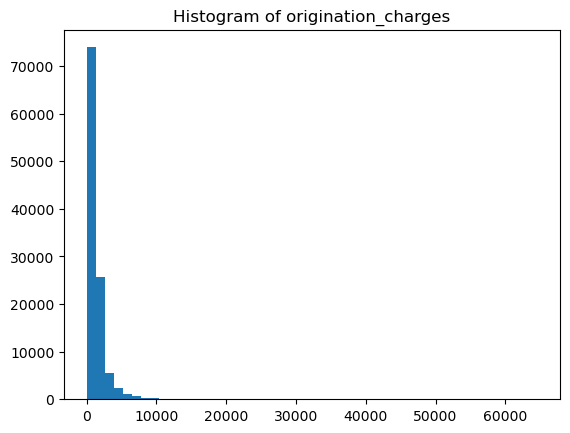

In [9]:
plt.hist(df['origination_charges'], bins=50)  # Adjust the number of bins as needed
plt.title('Histogram of origination_charges')
plt.show()

[4961.44    0.   1250.   ... 1214.27 3116.62 5308.  ]
27099


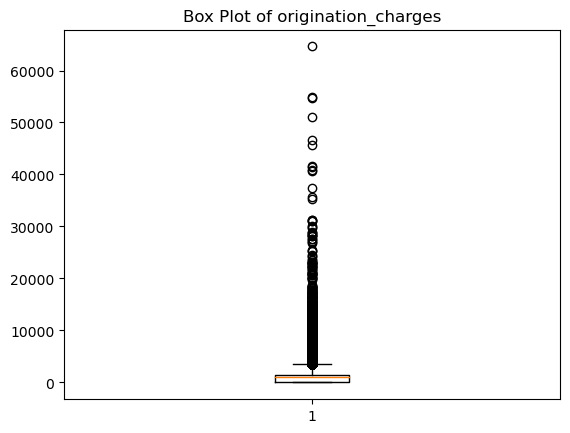

In [10]:
df1 = df.copy()
df1['origination_charges'] = pd.to_numeric(df['origination_charges'], errors='coerce')
df1 = df1.dropna(subset=['origination_charges'])

print(df['origination_charges'].unique())
print(df['origination_charges'].isna().sum())

# Create a box plot of the 'combined_loan_to_value_ratio' column
plt.boxplot(df1['origination_charges'])
plt.title('Box Plot of origination_charges')
plt.show()

## The outlier squashes the data.
We can draw a boxplot without the outlier.

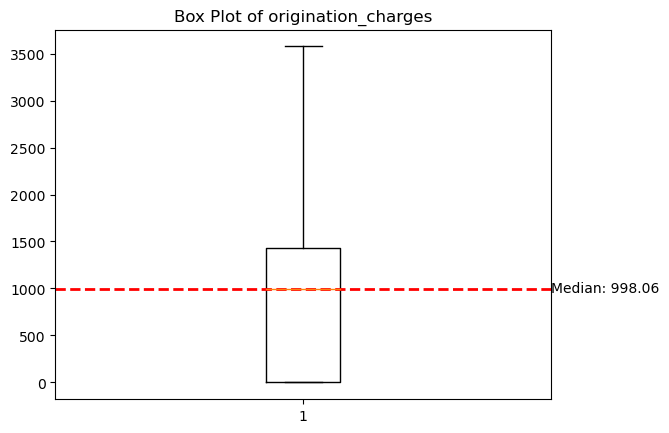

In [11]:
import matplotlib.pyplot as plt

# Create a box plot of the 'origination_charges' column
plt.boxplot(df1['origination_charges'], showfliers=False)  # Exclude outliers
plt.title('Box Plot of origination_charges')

# Calculate the median value
median_value = df1['origination_charges'].median()

# Add a median line
plt.axhline(median_value, color='r', linestyle='dashed', linewidth=2)

# Add text with the median value 5 pixels above the line
plt.text(1.5, median_value + 5, f'Median: {median_value}', va='center')

plt.show()


# Conclusion

this median seems more normal!
we have to remove outliers.

# Remove outliers

In [12]:
# Calculate the IQR for origination_charges
Q1 = df1['origination_charges'].quantile(0.25)
Q3 = df1['origination_charges'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a boolean mask for outliers
outliers_mask = (df1['origination_charges'] < lower_bound) | (df1['origination_charges'] > upper_bound)

# Create a new DataFrame without outliers
df_no_outliers = df1[~outliers_mask]

# Display the number of removed outliers
print(f'Number of removed outliers: {outliers_mask.sum()}')

Number of removed outliers: 6104


In [13]:
# Create a DataFrame of removed outliers
outliers_df = df1[outliers_mask]

In [14]:
# Display the values of the removed outliers
print(outliers_df['origination_charges'])

0          4961.44
7          6057.50
10         4618.63
13         4076.15
16         8899.63
            ...   
137436    21190.00
137438     6472.68
137453     3996.00
137463     5308.00
137491     7170.00
Name: origination_charges, Length: 6104, dtype: float64


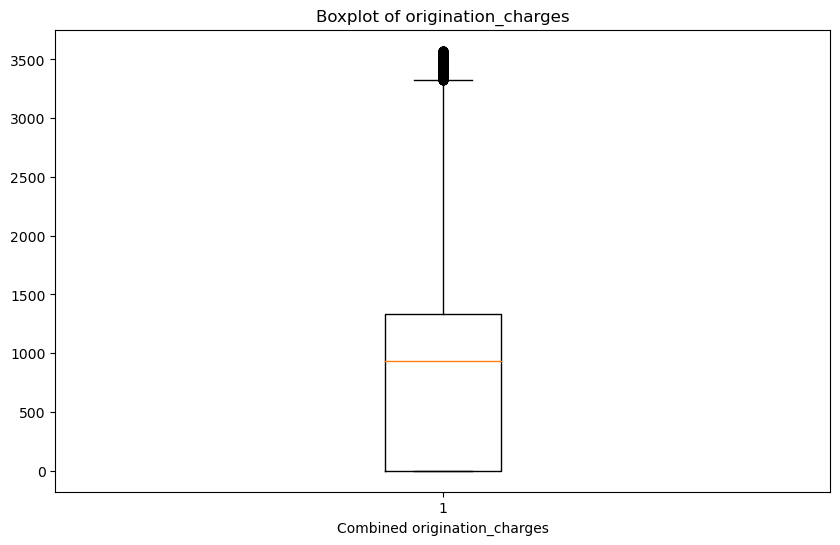

In [15]:
plt.figure(figsize=(10, 6))
plt.boxplot(df_no_outliers['origination_charges'])
plt.title('Boxplot of origination_charges')
plt.xlabel('Combined origination_charges')
plt.show()

In [16]:
# First, convert the 'combined_loan_to_value_ratio' column to numeric (float)
df_no_outliers.loc[:, 'origination_charges'] = pd.to_numeric(df_no_outliers['origination_charges'], errors='coerce')

# Now, calculate the minimum, maximum, and median
minimum_interest_rate = df_no_outliers['origination_charges'].min()
maximum_interest_rate = df_no_outliers['origination_charges'].max()
median_interest_rate = df_no_outliers['origination_charges'].median()

print("Minimum origination_charges:", minimum_interest_rate)
print("Maximum origination_charges:", maximum_interest_rate)
print("Median origination_charges:", median_interest_rate)

Minimum origination_charges: 0.0
Maximum origination_charges: 3575.0
Median origination_charges: 936.0


C:\Users\marku\AppData\Local\Temp\ipykernel_22008\3912971142.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.loc[:, 'origination_charges'] = pd.to_numeric(df_no_outliers['origination_charges'], errors='coerce')


In [17]:
print(df_no_outliers['origination_charges'].value_counts())

0.00       29457
1205.00     3315
1330.00     3221
1430.00     2414
1130.00     2219
           ...  
698.67         1
1824.66        1
370.37         1
446.45         1
3116.62        1
Name: origination_charges, Length: 17119, dtype: int64


In [18]:
# Remove categories below 100 entries.

#threshold = 100
#counts = df_no_outliers['origination_charges'].value_counts()
#values_to_remove = counts[counts < threshold].index
#df_filtered = df_no_outliers[~df_no_outliers['origination_charges'].isin(values_to_remove)]


# Make range categories

In [19]:
new_df = df_no_outliers.copy()

# Define a function to categorize 'origination_charges' into the desired ranges
def categorize_origination_charges(cost):
    # Define a list of upper bounds for the ranges
    upper_bounds = [500 * i for i in range(1, 41)]  # Generates ranges up to 8000 in increments of 200
    labels = [f'{lower}-{upper}' for lower, upper in zip([0] + upper_bounds, upper_bounds)]
    
    # Find the appropriate range for 'origination_charges' and return the label
    for label, upper_bound in zip(labels, upper_bounds):
        if cost <= upper_bound:
            return label
    return 'Other'

# Apply the categorization function to 'origination_charges' column
new_df['origination_charges'] = new_df['origination_charges'].apply(categorize_origination_charges)

# Print the result
print(new_df['origination_charges'].value_counts())

0-500        38954
1000-1500    29720
500-1000     16313
1500-2000     9030
2000-2500     5043
2500-3000     2968
3000-3500     2030
3500-4000      239
Name: origination_charges, dtype: int64


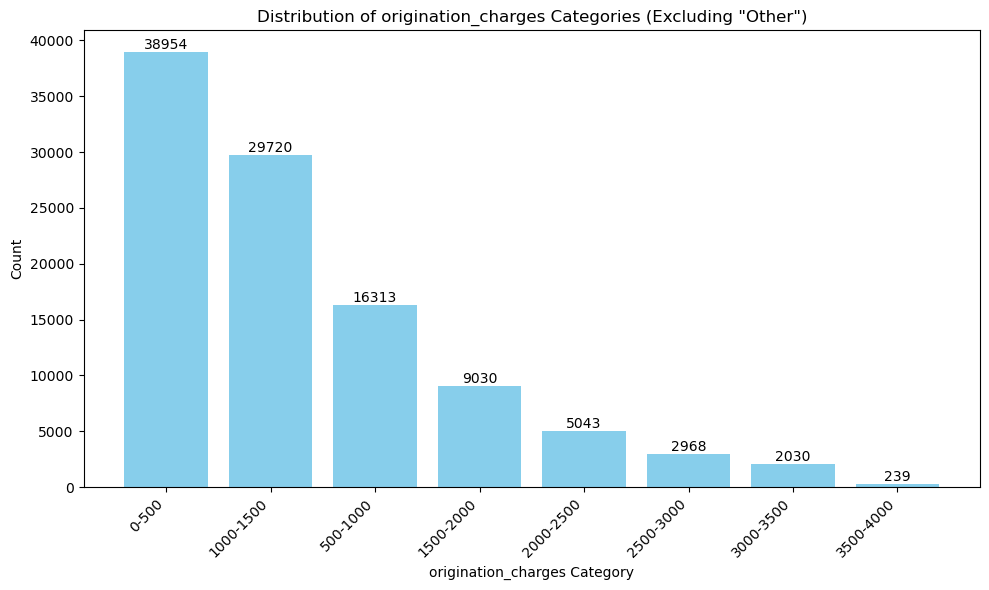

In [20]:
# Filter the DataFrame to exclude the 'Other' category
filtered_df = new_df[new_df['origination_charges'] != 'Other']

# Get the value counts for the filtered DataFrame
value_counts = filtered_df['origination_charges'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(value_counts.index, value_counts.values, color='skyblue')
plt.xlabel('origination_charges Category')
plt.ylabel('Count')
plt.title('Distribution of origination_charges Categories (Excluding "Other")')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Display the counts on top of the bars
for i, count in enumerate(value_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [21]:
df.to_csv('8_origination_charges.csv', index=False)